# 1. Load the dataset

In [6]:
import tqdm
import gdown
import zipfile

# Load the dataset from the local folder
dataset_url = 'https://drive.google.com/file/d/1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM/view?usp=sharing'
gdown.download(dataset_url, output='data.zip', quiet=False, fuzzy=True)

# extract the dataset from the zip file
with zipfile.ZipFile("data.zip","r") as zf:
    for member in tqdm.tqdm(zf.infolist(), desc='Extracting '):
        try:
            zf.extract(member, 'data')
        except zipfile.error as e:
            pass
print('Importing dataset completed')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM
From (redirected): https://drive.google.com/uc?id=1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM&confirm=t&uuid=2d14f0bf-5bc9-4bba-b181-a28519f94a26
To: C:\Users\jonat\PycharmProjects\ML-Final-Project\data.zip
100%|██████████| 583M/583M [02:16<00:00, 4.29MB/s] 
Extracting : 100%|██████████| 3770/3770 [00:10<00:00, 370.76it/s]

Importing dataset completed


In [1]:
import pathlib

# Count the number of images in the dataset
data_dir = pathlib.Path('./data')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"The dataset contains {image_count} images")

The dataset contains 3770 images


In [2]:
# divide the dataset into 5 categories
categories = ['beauty', 'family', 'fashion', 'fitness', 'food']
label2id_dict = dict((name, index) for index, name in enumerate(categories))
id2label_dict = dict((index, name) for index, name in enumerate(categories))
print('The categories are: ', categories)
dataset = []
for category in categories:
    dataset.append(list(data_dir.glob(category+'/*.jpg')))
    print(f"{category} images: {len(list(data_dir.glob(category+'/*.jpg')))}")

The categories are:  ['beauty', 'family', 'fashion', 'fitness', 'food']
beauty images: 754
family images: 754
fashion images: 754
fitness images: 754
food images: 754


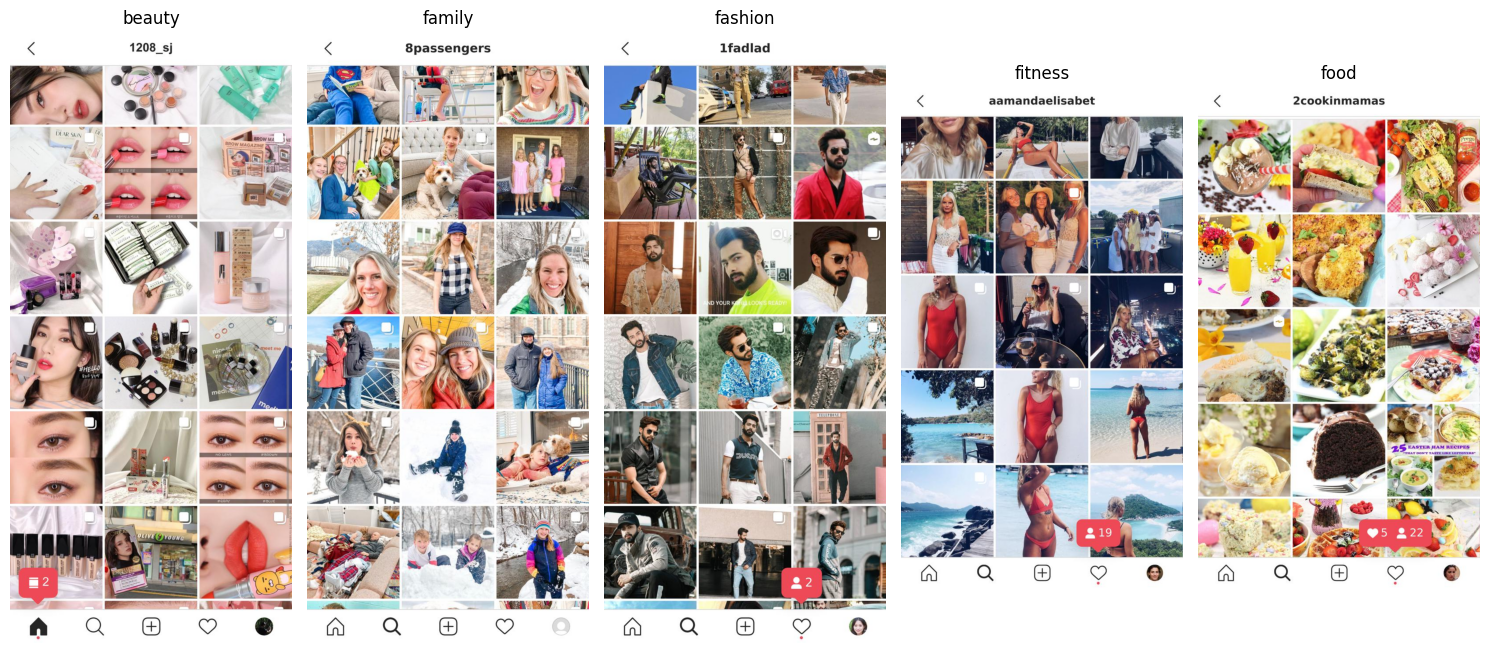

In [8]:
# plot one image per category
import matplotlib.pyplot as plt
import PIL

plt.figure(figsize=(15, 15))
for index, category in enumerate(categories):
    img = dataset[index][0]
    plt.subplot(1, 5, index+1)
    plt.imshow(PIL.Image.open(str(img)))
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 2. Process + Visualize the data

In [3]:
import numpy as np
import tensorflow as tf

seed = 42
# set seed for tensorflow take
tf.random.set_seed(seed)
# set seed for numpy
np.random.seed(seed)
print(f"Random seed set as {seed}")

Random seed set as 42


In [4]:
# split the dataset into training and testing
from tensorflow.keras.preprocessing import image_dataset_from_directory

# 80% of the images are used for training, 20% for testing
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(128, 128),
    batch_size=1,
    label_mode='categorical',
    labels='inferred',
    shuffle=True,
    color_mode="rgb",
)

test_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=1,
    label_mode='categorical',
    shuffle=True,
    color_mode="rgb"
)

# print the shape of the first image
for images, labels in train_ds.take(1):
    print(f"Shape of the image: {images[0].shape}")

Found 3770 files belonging to 5 classes.
Using 3016 files for training.
Found 3770 files belonging to 5 classes.
Using 754 files for validation.
Shape of the image: (128, 128, 3)


In [5]:
# print the first 10 rows of the training dataset in the format (image, label)
i = 0
for images, labels in train_ds.take(5):
    print(f"Image {i+1}: {images[0]}")
    print(f"Label {i+1}: {labels[0]}")
    i+=1

Image 1: [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
Label 1: [0. 0. 0. 0. 1.]
Image 2: [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 2

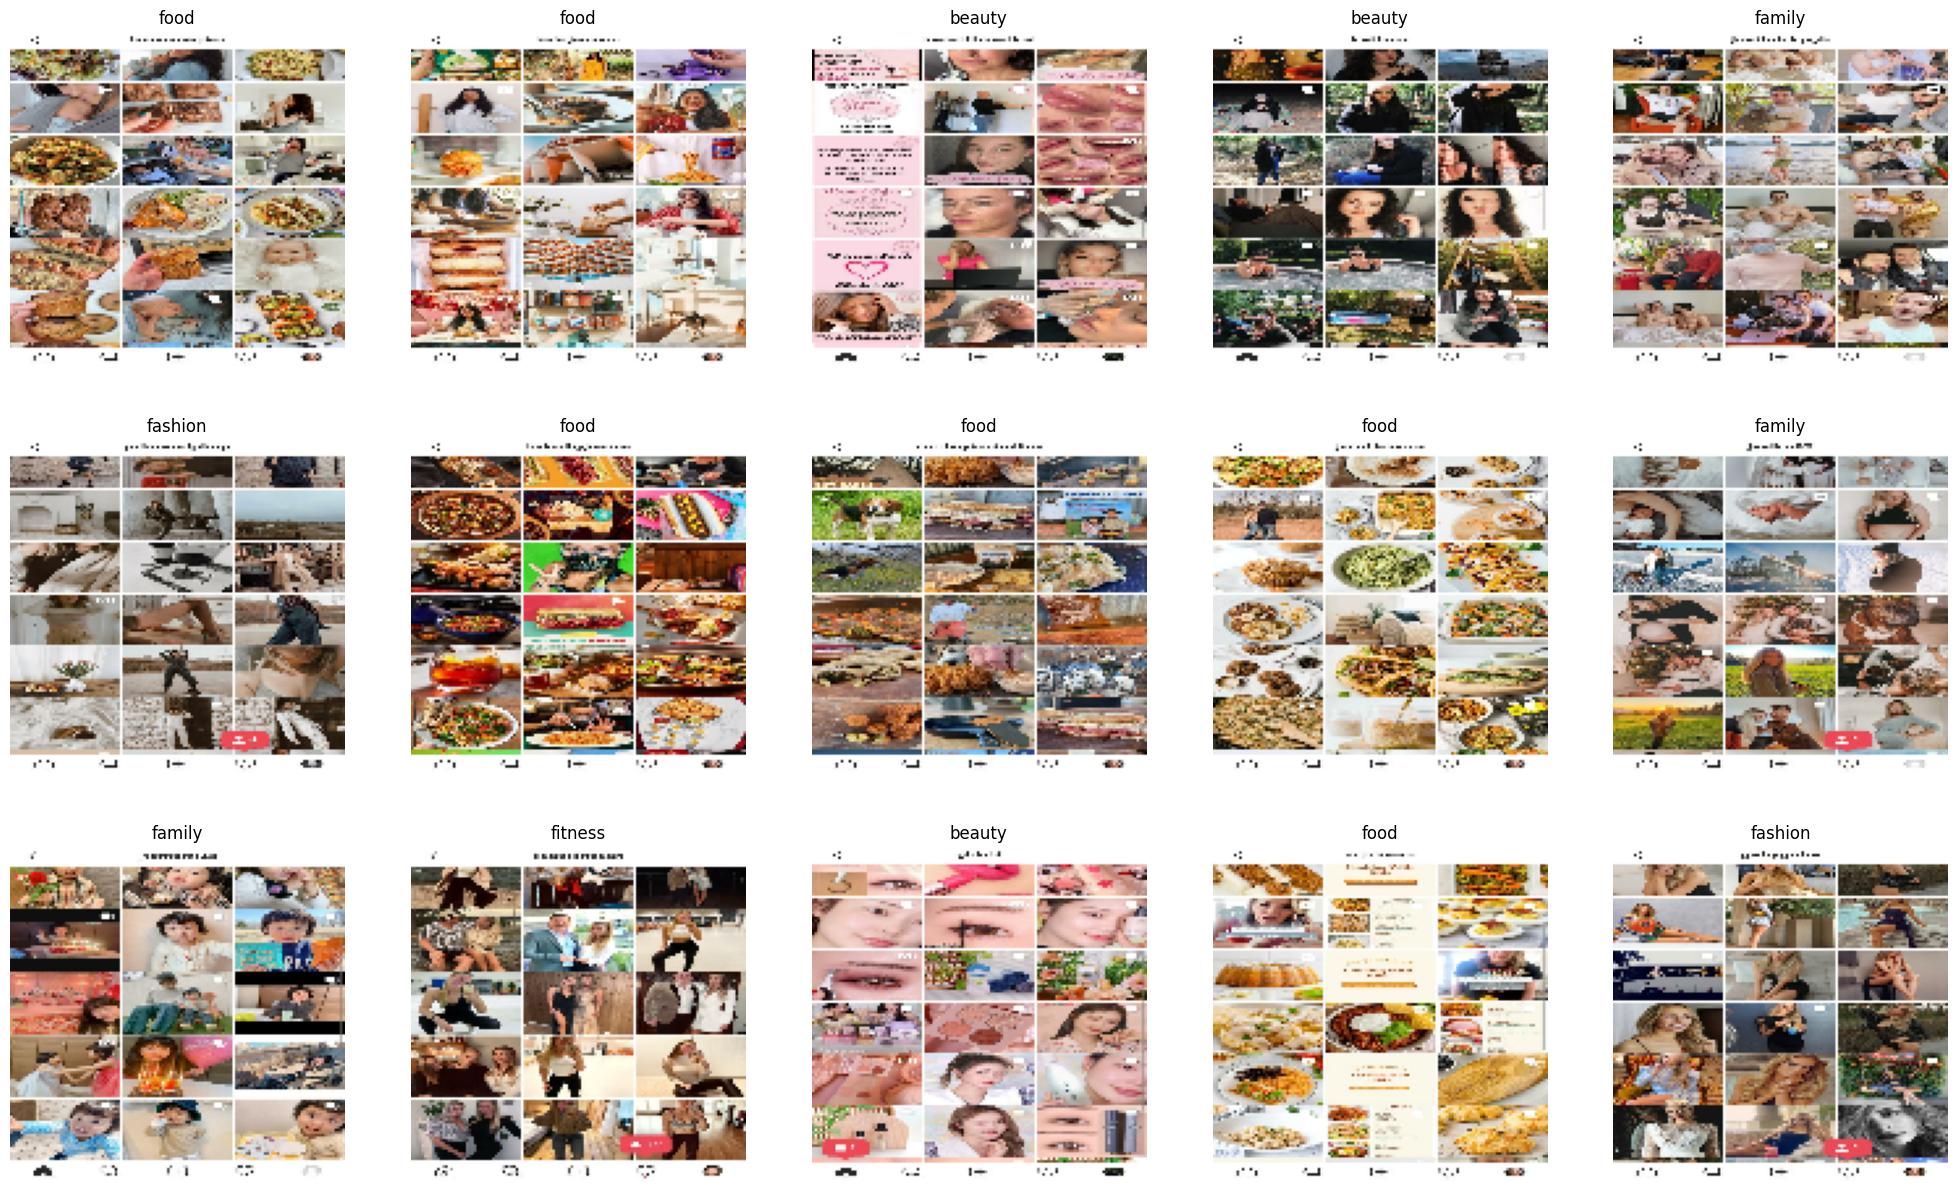

In [9]:
# plot the first 15 images of the training dataset
plt.figure(figsize=(25, 15))
i = 0
for images, labels in train_ds.take(15, ):
    image = images[0]
    label = labels[0]
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image.numpy().astype("uint8"), cmap='gray')
    plt.title(id2label_dict[label.numpy().argmax()])
    plt.axis("off")
    i += 1

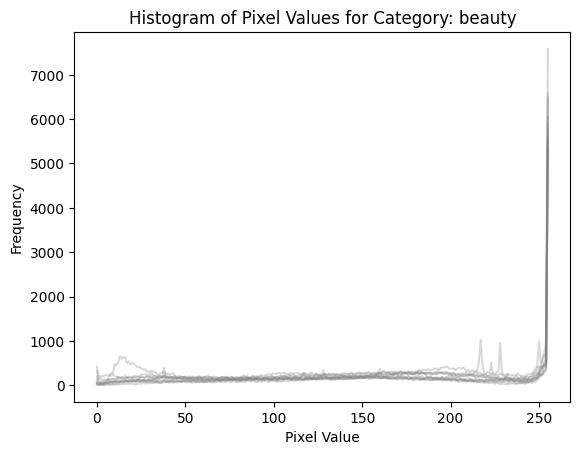

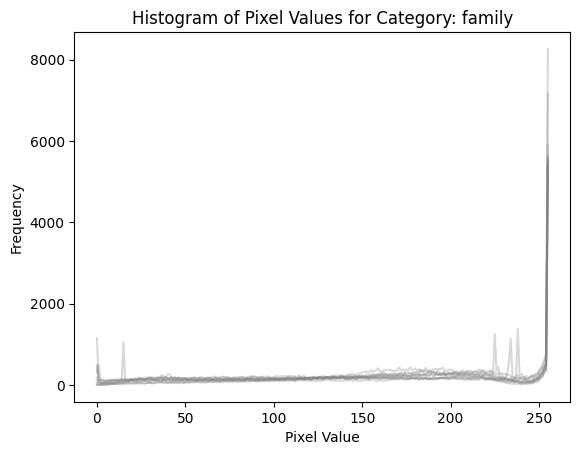

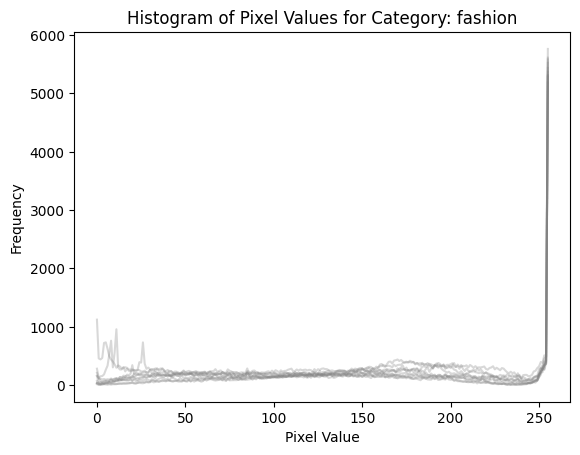

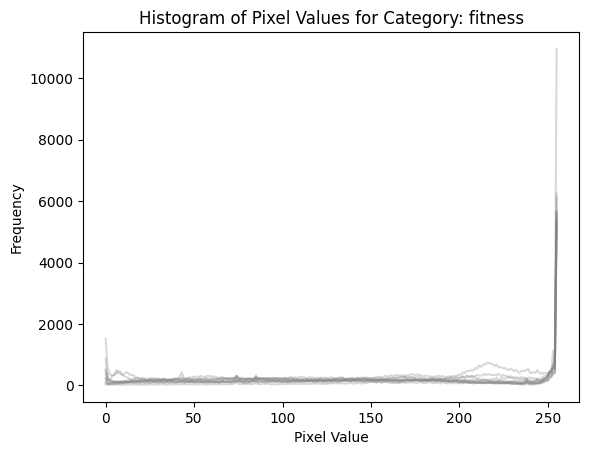

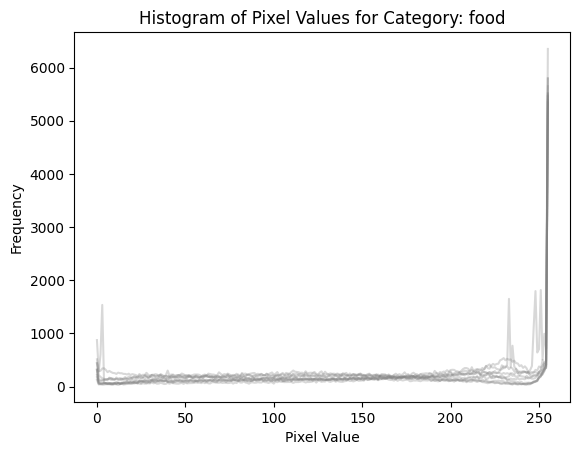

In [10]:
import numpy as np
import matplotlib.pyplot as plt

categories = train_ds.class_names

# Iterate over the categories
for category_index, category in enumerate(categories):
    histogram_values = []

    # Iterate over the train_ds dataset and compute histogram for the current category
    for images, labels in train_ds:
        image = images[0]  # Assuming batch size is 1
        label = labels[0].numpy()

        if np.argmax(label) == category_index:
            # Compute histogram of pixel values
            hist, bins = np.histogram(image.numpy().flatten(), bins=256, range=[0, 255])
            histogram_values.append(hist)

        if len(histogram_values) >= 10:  # Plot histograms for a maximum of 10 images per category
            break

    # Plot histogram for the current category
    plt.figure()
    # plot the histogram
    for hist_values in histogram_values:
        plt.plot(range(len(hist_values)), hist_values, color='grey', alpha=0.3)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Pixel Values for Category: {category}')
    plt.show()

Each image is 128x128 pixels with 1 channel (grayscale). The labels are one-hot encoded.
Each image contains multiple images in a grid. Now, we need to augment a new image from the grid image.

In [11]:
from keras.preprocessing.image import ImageDataGenerator
# Augment the image using keras preprocessing layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

# augment the image in train_ds
train_ds_aug = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
test_ds_aug = test_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# print the shape of the first image
for images, labels in train_ds_aug.take(1):
    print(f"Shape of the image: {images[0].shape}")

Shape of the image: (128, 128, 3)


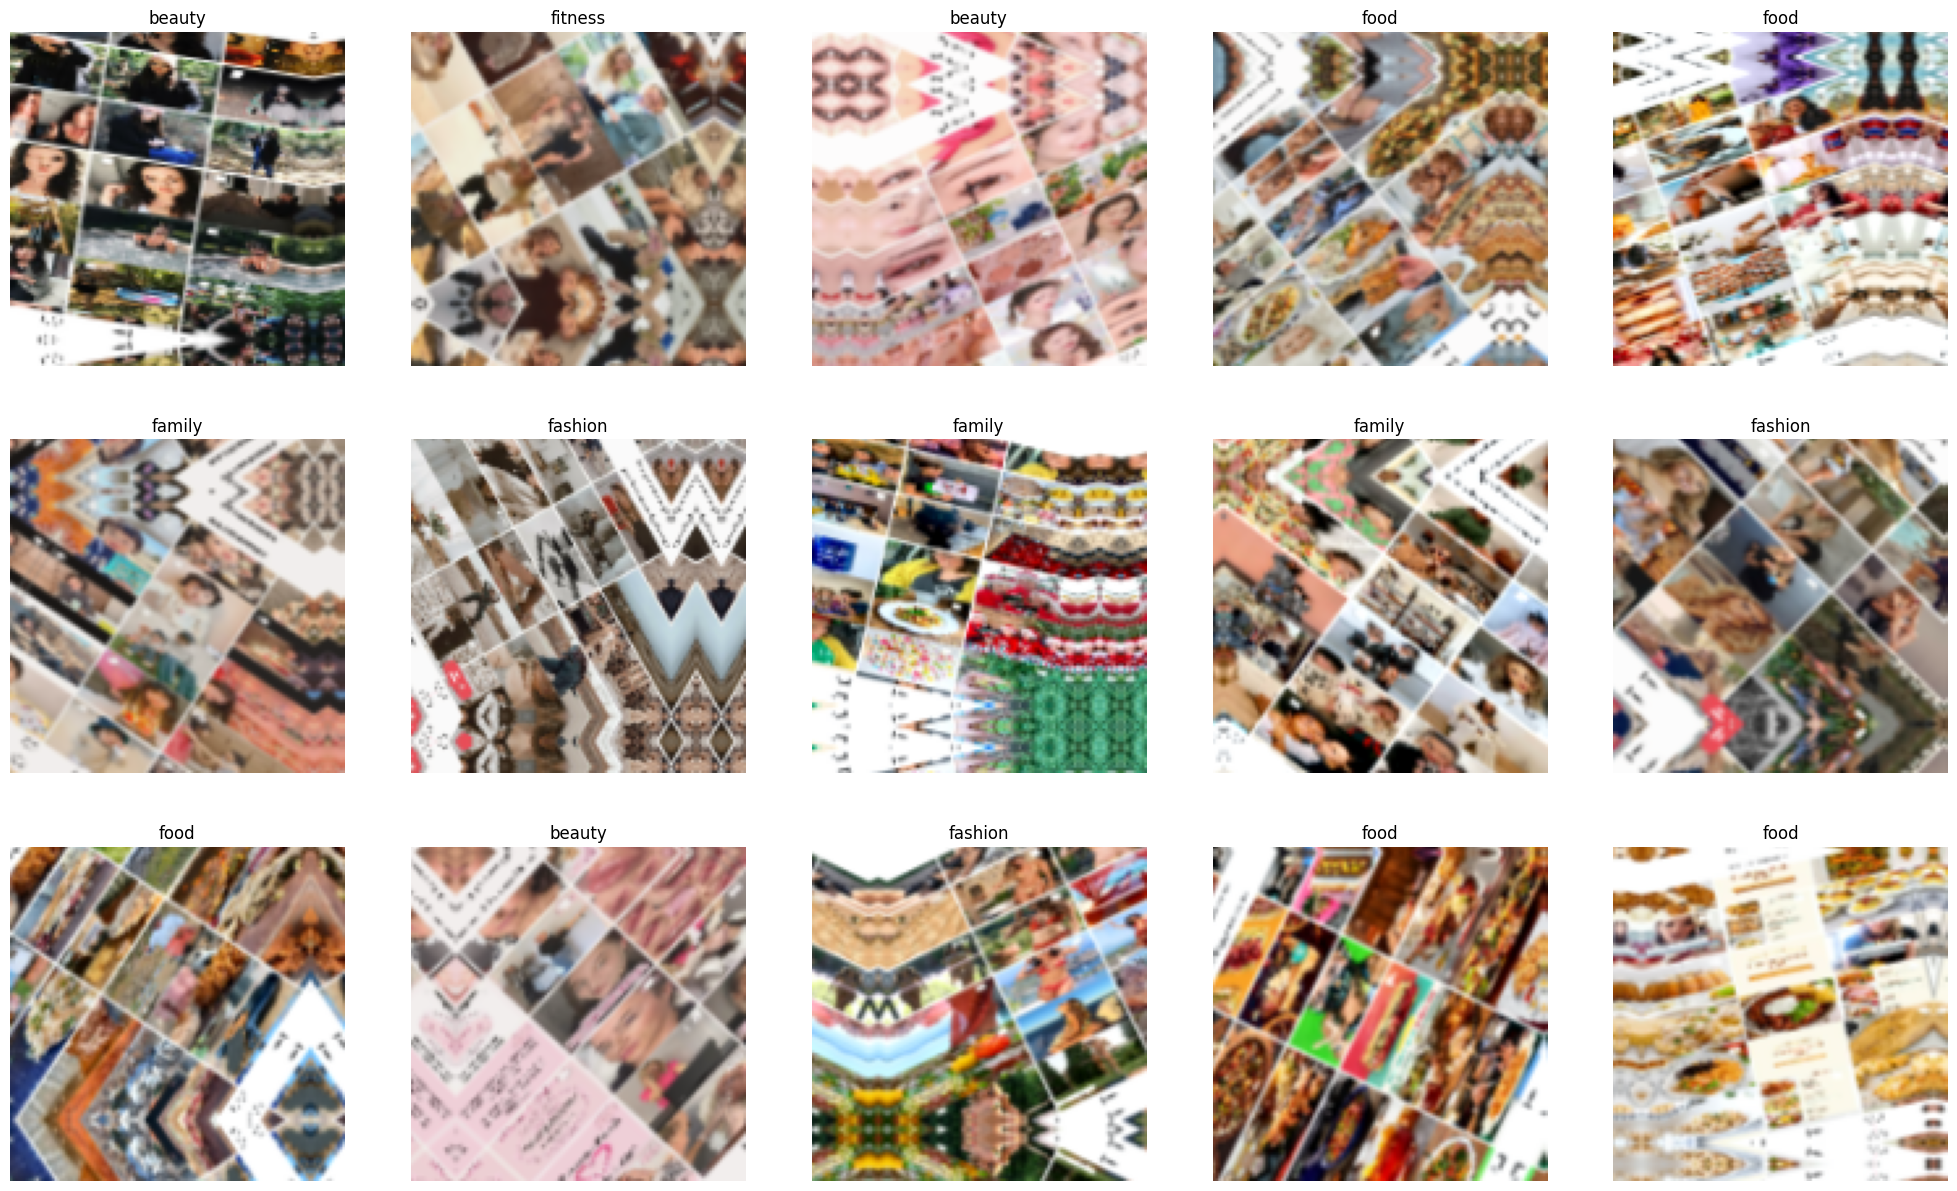

In [12]:
# plot the first 15 images of the training dataset
plt.figure(figsize=(25, 15))
i = 0
for images, labels in train_ds_aug.take(15, ):
    image = images[0]
    label = labels[0]
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image.numpy().astype("float"), cmap='gray')
    plt.title(id2label_dict[label.numpy().argmax()])
    plt.axis("off")
    i += 1

In [13]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model (excluding the top classification layers)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the weights of the VGG16 layers to prevent further training
vgg16.trainable = False

# Add a flatten layer to convert the output of VGG16 into a 1D array
flatten_layer = Flatten()(vgg16.output)

# Create a new model that takes VGG16 output as input and outputs the flattened representation
flatten_model = Model(inputs=vgg16.input, outputs=flatten_layer)

# Apply the flatten_model to train_ds_aug and test_ds_aug
train_ds = train_ds_aug.map(lambda x, y: (flatten_model(x), y))
test_ds = test_ds_aug.map(lambda x, y: (flatten_model(x), y))

# print the shape of the first image in the training dataset
for images, labels in train_ds.take(1):
    print(f"Shape of the image in train dataset: {images[0].shape}")

for images, labels in test_ds.take(1):
    print(f"Shape of the image in test dataset: {images[0].shape}")

Shape of the image in train dataset: (8192,)
Shape of the image in test dataset: (8192,)


In [14]:
# print the first 10 rows of the training dataset in the format (image, label)
i = 0
for images, labels in train_ds.take(5):
    print(f"Image {i+1}: {images[0]}")
    print(f"Label {i+1}: {labels[0]}")
    i+=1

Image 1: [0.8270432  0.         0.1769019  ... 0.         0.65435874 0.        ]
Label 1: [0. 0. 0. 0. 1.]
Image 2: [1.0207872  0.         0.55195034 ... 0.         0.6954541  0.        ]
Label 2: [0. 0. 1. 0. 0.]
Image 3: [0.10524903 0.         0.         ... 0.         0.45079237 0.        ]
Label 3: [0. 0. 0. 1. 0.]
Image 4: [1.0532396  0.         0.10625985 ... 0.         0.6514267  0.        ]
Label 4: [1. 0. 0. 0. 0.]
Image 5: [0.         0.         0.20937023 ... 0.         0.6505614  0.        ]
Label 5: [0. 0. 0. 0. 1.]


# 3. Build a model

In [15]:
# In order to run the model more efficiently, we will store parts of the dataset in cache memory.
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(5000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
from keras.layers.experimental import RandomFourierFeatures
from keras import Sequential

# Build a Quasi SVM model with linear kernel
gamma = 0.01

model = Sequential([
    tf.keras.layers.Input(shape=(8192,)),
     RandomFourierFeatures(
        output_dim=4096, scale=10.0, kernel_initializer="gaussian"
    ),
    tf.keras.layers.Dense(5, activation='softmax'),
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='hinge',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_fourier_features (R  (None, 4096)              33558529  
 andomFourierFeatures)                                           
                                                                 
 dense_6 (Dense)             (None, 5)                 20485     
                                                                 
Total params: 33579014 (128.09 MB)
Trainable params: 20485 (80.02 KB)
Non-trainable params: 33558529 (128.02 MB)
_________________________________________________________________


In [19]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=3,
    workers=4,
    use_multiprocessing=True
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')

Epoch 1/3
2404/3016 [======================>.......] - ETA: 24s - loss: 1.0618 - accuracy: 0.3569

In [16]:
import tensorflow as tf
from keras import Sequential

# Build SVM model with linear kernel
gamma = 0.01

model = Sequential([
    tf.keras.layers.Input(shape=(8192,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(gamma))
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_hinge',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 5)                

In [17]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=3,
    workers=4,
    use_multiprocessing=True
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')

Epoch 1/3
3016/3016 [==============================] - 567s 57ms/step - loss: 1.0297 - accuracy: 0.1870 - val_loss: 1.0013 - val_accuracy: 0.2029
Epoch 2/3
 244/3016 [=>............................] - ETA: 59s - loss: 1.0012 - accuracy: 0.2049


KeyboardInterrupt



In [ ]:
# Confusion matrix
tf.math.confusion_matrix(
    test_ds.map(lambda x, y: y).unbatch(),
    np.argmax(model.predict(test_ds.map(lambda x, y: x).unbatch()), axis=1),
    num_classes=5
)

In [38]:
# build a random forest model for train_ds
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model, y_train is categorical labels
X_train = np.asarray(list(train_ds.map(lambda x, y: x)))
y_train = np.asarray(list(train_ds.map(lambda x, y: y)))
X_train = X_train.numpy()
y_train = y_train.numpy()
print(X_train.shape)


# # train the model for categorical labels, display the progress bar
# rf.fit(X_train, y_train)
#
# # evaluate the model on test_ds
# X_test, y_test = next(iter(test_ds))
# X_test = X_test.numpy()
# y_test = y_test.numpy()
#
# # evaluate the model
# rf.score(X_test, y_test)

KeyboardInterrupt: 

In [34]:
# Convert the lists to NumPy arrays
train_lst = list(train_ds.as_numpy_iterator())
x_train, y_train = zip(*train_lst)
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
test_lst = list(test_ds.as_numpy_iterator())
x_test, y_test = zip(*test_lst)
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)
# print the first 5 elements of x_train and y_train
print(x_train[:5])
print(y_train[:5])
print(x_test[:5])
print(y_test[:5])
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

[[0.         0.         0.08950275 ... 0.         0.76927125 0.        ]
 [0.91538304 0.         0.5018358  ... 0.         0.81656    0.        ]
 [1.6909698  0.         0.07782263 ... 0.         0.5432663  0.        ]
 [0.03415948 0.         0.11978942 ... 0.         0.6590032  0.        ]
 [0.         0.         0.         ... 0.         0.87744606 0.        ]]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[[0.00749305 0.         0.         ... 0.         1.1386514  0.        ]
 [0.21355847 0.         0.         ... 0.07267201 0.83970976 0.        ]
 [0.01086053 0.         0.05447584 ... 0.         1.0868466  0.        ]
 [0.         0.         0.         ... 0.         0.55885065 0.        ]
 [0.         0.         0.         ... 0.         0.7161857  0.        ]]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [37]:
import numpy as np
from keras import Sequential
from sklearn.ensemble import AdaBoostClassifier
# import keras classifier
from scikeras.wrappers import KerasClassifier
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Build AdaBoost model with linear kernel
gamma = 0.01

model = Sequential([
    tf.keras.layers.Input(shape=(8192,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(gamma))
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# wrap the model with keras wrapper
model = KerasClassifier(model)

# Convert the model to AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [38]:
# evaluate the model
ada_model.score(x_test, y_test)

0.46684350132625996